In [1]:
# Kütüphaneleri içe aktar (pandas, matplotlib, seaborn)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Verileri CSV dosyasından oku
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')


In [3]:
# Verilerin ilk 5 satırını görüntüle
print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [4]:
# Verilerin genel bilgileri
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
# Eksik değerlerin sayısı
ev_data.isnull().sum()


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
# Eksik değerleri sil
ev_data = ev_data.dropna()

In [7]:
# Seaborn kütüphanesini beyaz gridli tema ile ayarlama
sns.set_style("whitegrid")

In [8]:
# ## Elektrikli Araç Sahipliği Süreç İçi 

C:\Users\melisa\AppData\Local\Temp\ipykernel_892\1990845564.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")


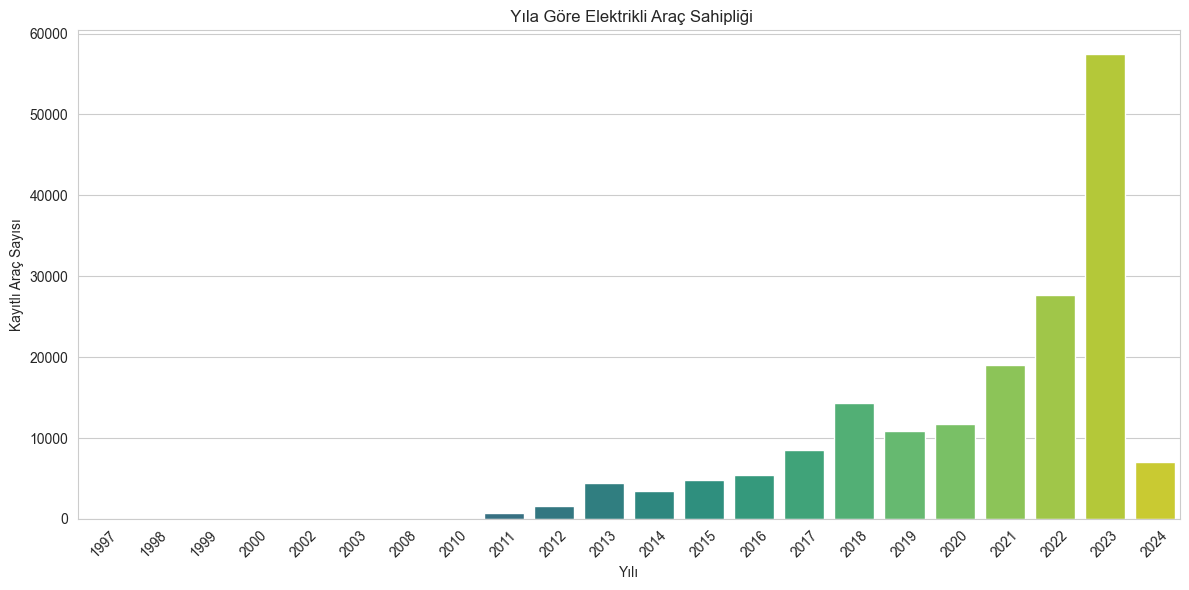

In [23]:
#  yıla göre elektrikli araç sahipliği sayısı
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="viridis")
plt.title(' Yıla Göre Elektrikli Araç Sahipliği')
plt.xlabel('Yılı')
plt.ylabel('Kayıtlı Araç Sayısı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# şehir seviyesinde coğrafi dağılım
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index


In [25]:
# Bu şehirler için veri kümesini filtreleme
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

In [26]:
# Bu en üst şehirlerde elektrikli araç dağılımının analizi
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Araç Sayısı')

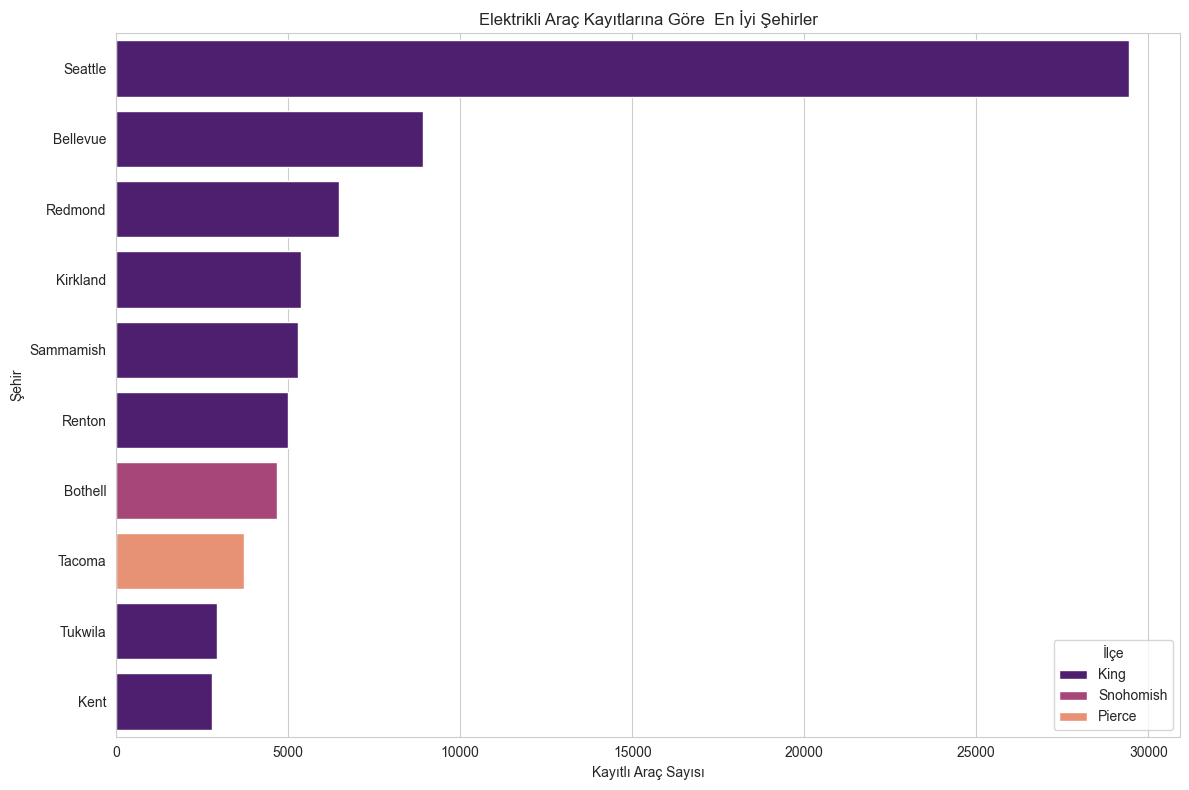

In [21]:
# Bu şehirlerdeki en iyi 10 şehri görselleştirme
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Araç Sayısı', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Elektrikli Araç Kayıtlarına Göre  En İyi Şehirler')
plt.xlabel('Kayıtlı Araç Sayısı')
plt.ylabel('Şehir')
plt.legend(title='İlçe')
plt.tight_layout()
plt.show()

C:\Users\melisa\AppData\Local\Temp\ipykernel_892\3389527133.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


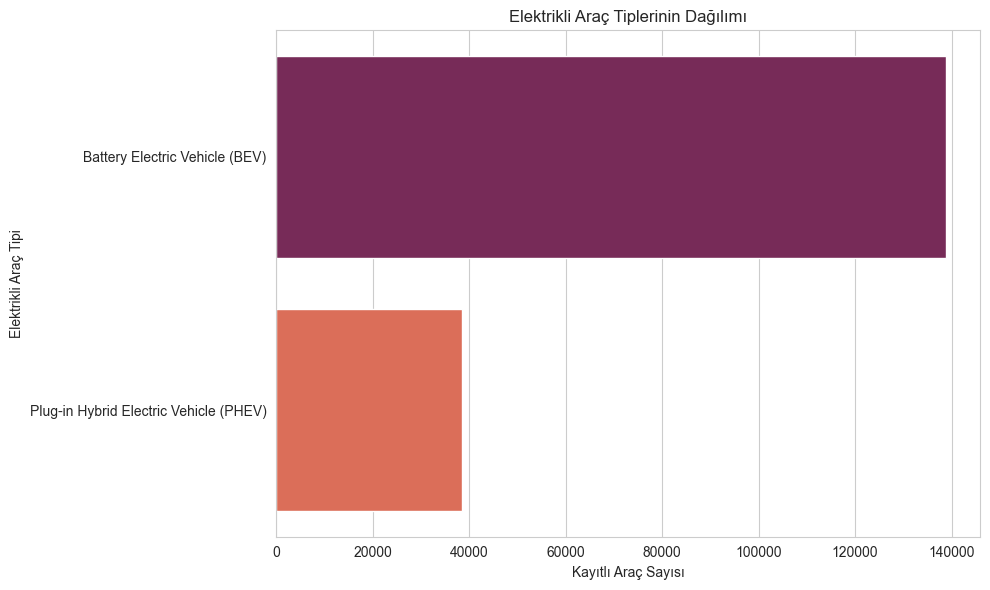

In [16]:
# Elektrikli araç tiplerinin dağılımının analizi
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Elektrikli Araç Tiplerinin Dağılımı')
plt.xlabel('Kayıtlı Araç Sayısı')
plt.ylabel('Elektrikli Araç Tipi')
plt.tight_layout()
plt.show()


C:\Users\melisa\AppData\Local\Temp\ipykernel_892\2493442984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


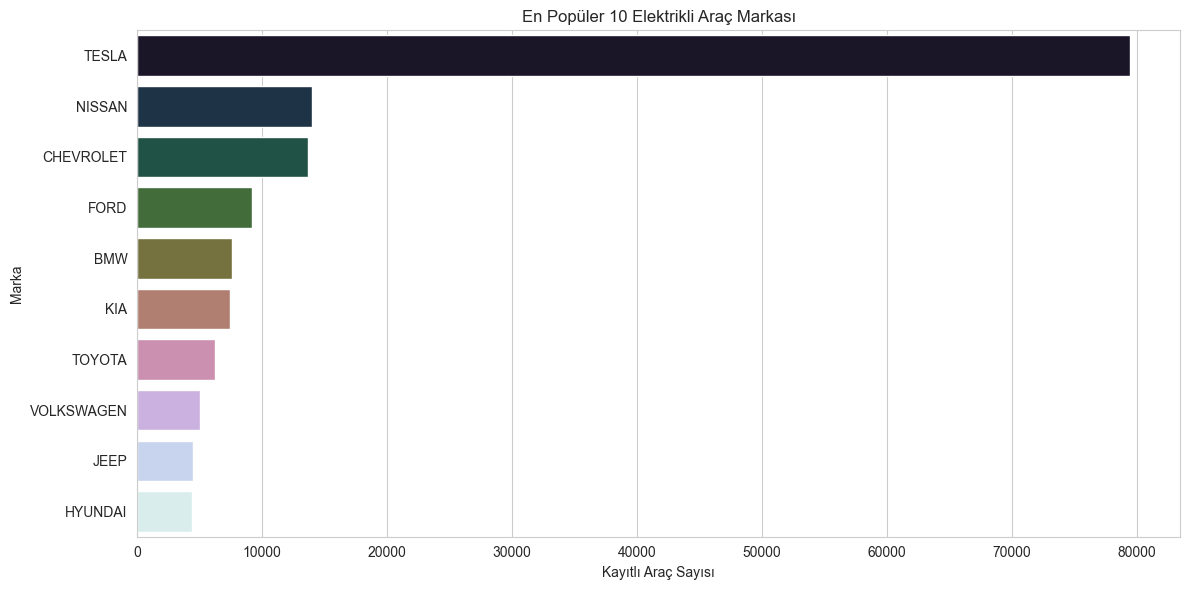

In [19]:
# Elektrikli araç üreticilerinin popülaritesi analizi
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Netlik için ilk 10'a sınırlama

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('En Popüler 10 Elektrikli Araç Markası')
plt.xlabel('Kayıtlı Araç Sayısı')
plt.ylabel('Marka')
plt.tight_layout()
plt.show()


# Kayıtlı araç sayısına göre en iyi 3 üretici seçimi
top_3_makes = ev_make_distribution.head(3).index

# Bu en iyi üreticiler için veri kümesini filtreleme
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# Bu en iyi üreticiler içinde elektrikli araç modellerinin popülaritesi analizi


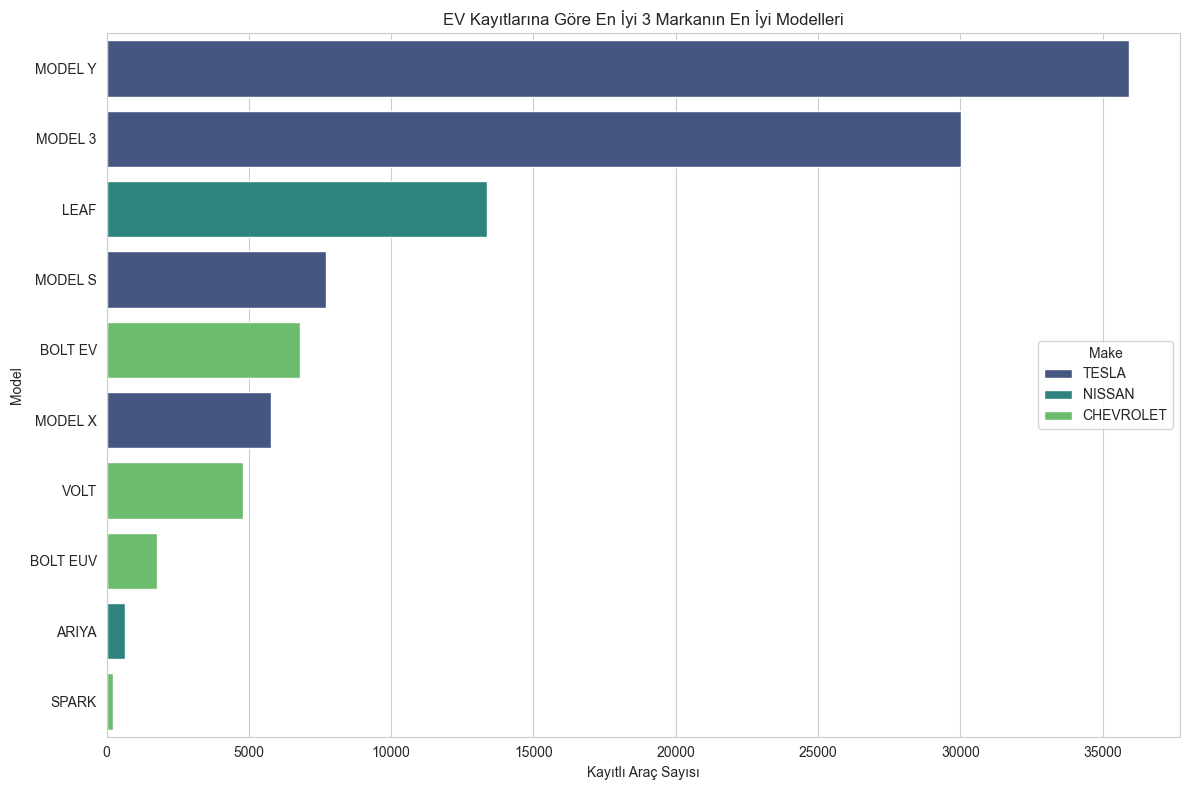

In [35]:

# kayıtlı araç sayısına göre ilk 3 üreticinin seçilmesi
top_3_makes = ev_make_distribution.head(3).index

# bu en iyi üreticiler için veri kümesini filtreleme
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# EV modellerinin bu önde gelen üreticiler arasındaki popülaritesini analiz ediyoruz
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# netlik sağlamak amacıyla bu üreticiler arasındaki en iyi 10 modeli görselleştiriyoruz
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('EV Kayıtlarına Göre En İyi 3 Markanın En İyi Modelleri')
plt.xlabel('Kayıtlı Araç Sayısı')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

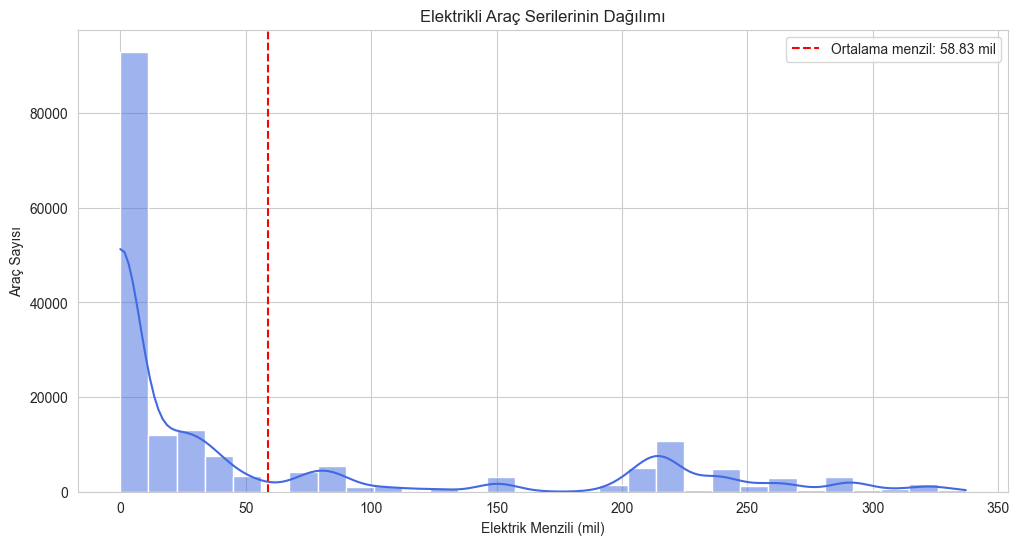

In [37]:
# elektrik menzilinin dağılımını analiz etmek
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Elektrikli Araç Serilerinin Dağılımı')
plt.xlabel('Elektrik Menzili (mil)')
plt.ylabel('Araç Sayısı')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Ortalama menzil: {ev_data["Electric Range"].mean():.2f} mil')
plt.legend()
plt.show()

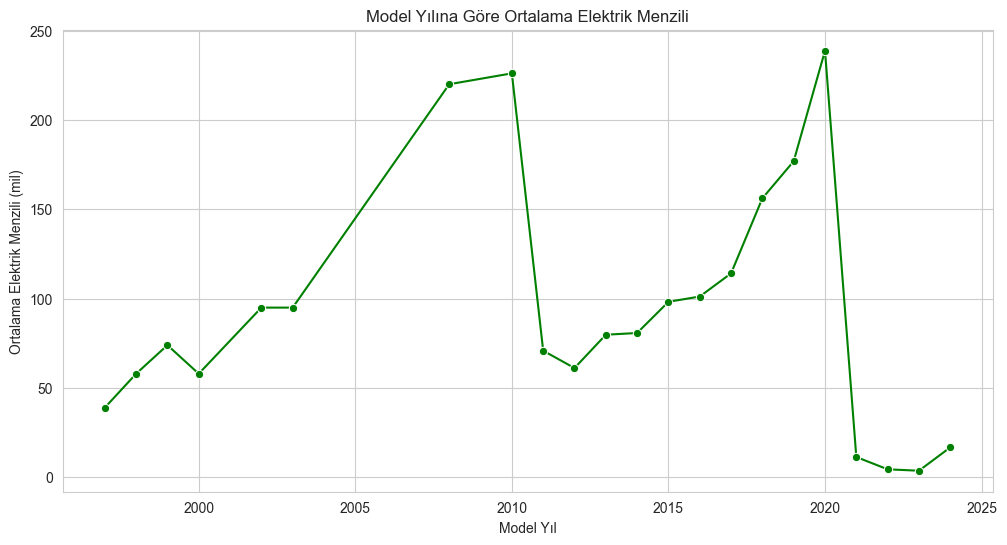

In [38]:

# model yılına göre ortalama elektrik menzilinin hesaplanması
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Model Yılına Göre Ortalama Elektrik Menzili')
plt.xlabel('Model Yıl')
plt.ylabel('Ortalama Elektrik Menzili (mil)')
plt.grid(True)
plt.show()

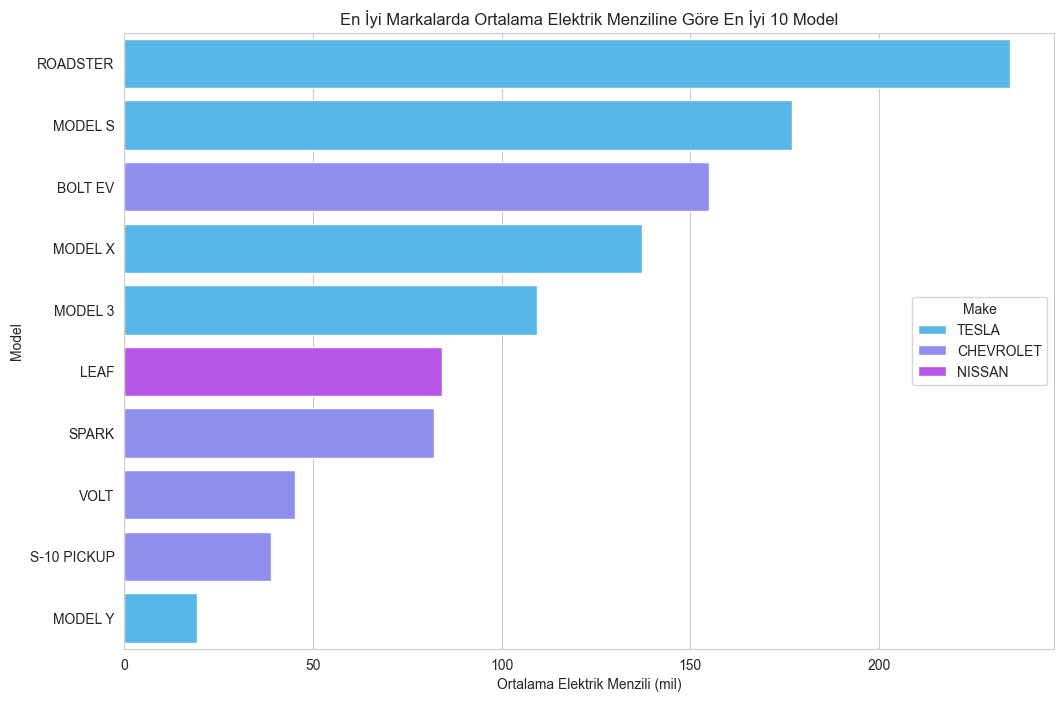

In [39]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# en yüksek ortalama elektrik menziline sahip ilk 10 model

top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('En İyi Markalarda Ortalama Elektrik Menziline Göre En İyi 10 Model')
plt.xlabel('Ortalama Elektrik Menzili (mil)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [32]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [33]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


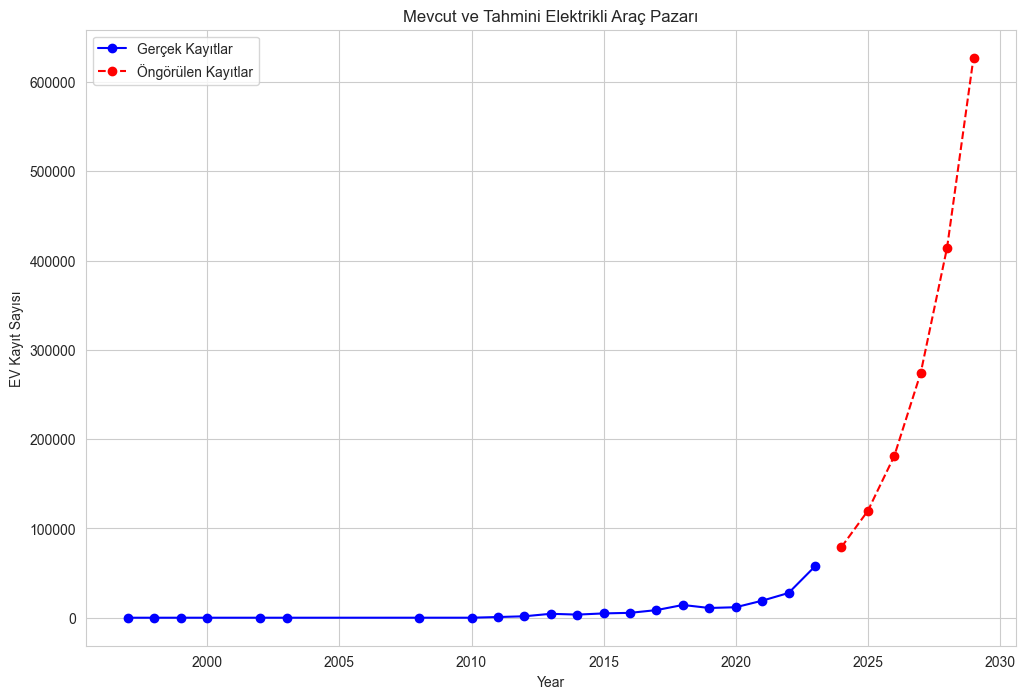

In [41]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Gerçek Kayıtlar')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Öngörülen Kayıtlar')

plt.title('Mevcut ve Tahmini Elektrikli Araç Pazarı')
plt.xlabel('Year')
plt.ylabel('EV Kayıt Sayısı')
plt.legend()
plt.grid(True)

plt.show()